# **Разведывательный анализ данных**

Перед тем как строить модель для кредитного скоринга, нам нужно провести разведывательный анализ данных, чтобы узнать больше о данных содержащихся в датасете.

Выделим несколько целей, которые мы бы хотели достичь в результате анализа данных:

1. Узнать о смысле признаков для нашей модели, посмотреть на их распределение, попопробовать на начальном этапе откинуть несколько заведамо неинформативных признаков, выделить целевую переменную;
2. Посмотреть, есть ли пропуски в нашем датасете, если же есть, то проанализировать стоит ли выкидывать объекты с пропусками, или заменить их какими-либо точечными статистиками (mean, median и т.д.);
3. Преобразовать признаки, если требуется их преобразовать;
4. Предложить варианты решения исходной задачи, построить baseline модели машинного обучения, выделить ключевые метрики для оптимизации модели. 


In [26]:
#Подключим библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use("seaborn-v0_8")

In [4]:
credit_score_df = pd.read_csv("~/Documents/datasets/application_train.csv")

credit_score_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Для начала нам нужно исследовать наш датасет [Kaggle: Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/data), данный датасет использовался для соренования на платформе Kaggle, участники данного соревнования решали задачу классификации того, вернет ли заёмщик деньги банку или нет (для кредиторов без кредитной истории), то есть решали задачу кредитного скоринга, соревнование проходило в 2018 году.

Датасет содержит 122 призника, но этих признаков слишком много для создания большой модели в условниях ограниченных вычислительных ресурсов, поэтому для создания модели и анализа данных мы используем только первые 41 признаков, приведём описание данных призаков:

- `SK_ID_CURR` - ID кредита в выборке;
- `TARGET` - Целевая переменная (1 - клиент, испытывающий трудности с оплатой: он просрочил платеж более чем на X дней по крайней мере по одному из первых Y платежей по кредиту в нашей выборке, 0 - все остальные случаи);
- `NAME_CONTRACT_TYPE` - Идентификатор, является ли кредит наличным или возобновляемым;
- `CODE_GENDER` - Пол клиента;
- `FLAG_OWN_CAR` - Идентификатор, если клиент владеет автомобилем;
- `FLAG_OWN_REALTY` - Идентификатор, владеет ли клиент домом или квартирой;
- `CNT_CHILDREN` - Количество детей у клиента;
- `AMT_INCOME_TOTAL` - Доход клиента;
- `AMT_CREDIT` - Сумма кредита;
- `AMT_ANNUITY` - Кредитный аннуитет;
- `AMT_GOODS_PRICE` - Для потребительских кредитов - это цена товара, на который выдается кредит;
- `NAME_TYPE_SUITE` - Кто сопровождал клиента при оформлении кредита;
- `NAME_INCOME_TYPE` - Тип дохода клиента (бизнесмен, работающий, находящийся в декретном отпуске и т.д.);
- `NAME_EDUCATION_TYPE` - Уровень высшего образования, полученного клиентом;
- `NAME_FAMILY_STATUS` - Семейное положение клиента;
- `NAME_HOUSING_TYPE` - Какова жилищная ситуация клиента (снимает жилье, живет с родителями и т.д.);
- `REGION_POPULATION_RELATIVE` - Нормализованная численность населения региона, в котором живет клиент (большее число означает, что клиент живет в более населенном регионе);
- `DAYS_BIRTH` - Возраст клиента в днях на момент подачи заявки;
- `DAYS_EMPLOYED` - За сколько дней до подачи заявления человек приступил к текущей работе;
- `DAYS_REGISTRATION` - За сколько дней до подачи заявки клиент изменил свою регистрацию
- `DAYS_ID_PUBLISH` - За сколько дней до подачи заявки клиент сменил документ, удостоверяющий личность, с которым он подавал заявку на кредит;
- `OWN_CAR_AGE` - Возраст автомобиля клиента;
- `FLAG_MOBIL` - Предоставил ли клиент мобильный телефон (1=ДА, 0=НЕТ);
- `FLAG_EMP_PHONE` - Предоставил ли клиент рабочий телефон (1=ДА, 0=НЕТ);
- `FLAG_WORK_PHONE` - Предоставил ли клиент рабочий телефон (1=ДА, 0=НЕТ);
- `FLAG_CONT_MOBILE` - Был ли мобильный телефон доступен (1=ДА, 0=НЕТ);
- `FLAG_PHONE` - Предоставил ли клиент домашний телефон (1=ДА, 0=НЕТ);
- `FLAG_EMAIL` - Предоставил ли клиент электронную почту (1=ДА, 0=НЕТ);
- `OCCUPATION_TYPE` - Какой род занятий у клиента;
- `CNT_FAM_MEMBERS` - Сколько членов семьи у клиента;
- `REGION_RATING_CLIENT` - Наш рейтинг региона, в котором живет клиент (1,2,3);
- `REGION_RATING_CLIENT_W_CITY` - Наш рейтинг региона проживания клиента с учетом города (1,2,3);
- `WEEKDAY_APPR_PROCESS_START` - В какой день недели клиент подал заявку на получение кредита;
- `HOUR_APPR_PROCESS_START` - Примерно в котором часу клиент подал заявку на получение кредита;
- `REG_REGION_NOT_LIVE_REGION` - Идентификатор, если постоянный адрес клиента не совпадает с контактным адресом (1=разный, 0=одинаковый, на уровне региона);
- `REG_REGION_NOT_WORK_REGION` - Идентификатор, если постоянный адрес клиента не совпадает с рабочим адресом (1=разный, 0=одинаковый, на уровне региона);
- `LIVE_REGION_NOT_WORK_REGION` - Идентификатор, если контактный адрес клиента не совпадает с рабочим адресом (1=разный, 0=одинаковый, на уровне региона);
- `REG_CITY_NOT_LIVE_CITY` - Идентификатор, если постоянный адрес клиента не совпадает с контактным адресом (1=разный, 0=одинаковый, на уровне города);
- `REG_CITY_NOT_WORK_CITY` - Идентификатор, если постоянный адрес клиента не совпадает с адресом работы (1=разный, 0=одинаковый, на уровне города);
- `LIVE_CITY_NOT_WORK_CITY` - Идентификатор, если контактный адрес клиента не совпадает с рабочим адресом (1=разный, 0=одинаковый, на уровне города);
- `ORGANIZATION_TYPE` - Тип организации, в которой работает клиент.

In [10]:
#Уменьшим количество признаков
credit_score_df = credit_score_df.iloc[:,:41]
credit_score_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,2,THURSDAY,11,0,0,0,0,1,1,Religion


In [11]:
#Удалим незначащий признак, отвечающий за ID кредита
credit_score_df.drop(columns=["SK_ID_CURR"], inplace = True)

Получим информацию о типах данных признаков.

In [17]:
credit_score_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  object 
 2   CODE_GENDER                  307511 non-null  object 
 3   FLAG_OWN_CAR                 307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307499 non-null  float64
 9   AMT_GOODS_PRICE              307233 non-null  float64
 10  NAME_TYPE_SUITE              306219 non-null  object 
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

Как мы видим, в датасете присутствуют `NULL` значения. Также 12 признаков в датасете являются категориальными.

Теперь построим `pairplot` для каждой пары признаков типа `float`, чтобы визуально посмотреть как взаимодействуют друг с другом признаки/

In [29]:
float_features = credit_score_df.columns[(credit_score_df.dtypes == "float") | (credit_score_df.columns == "TARGET")]

cs_df_sub = credit_score_df[float_features]

sns.pairplot(cs_df_sub, hue = "TARGET")

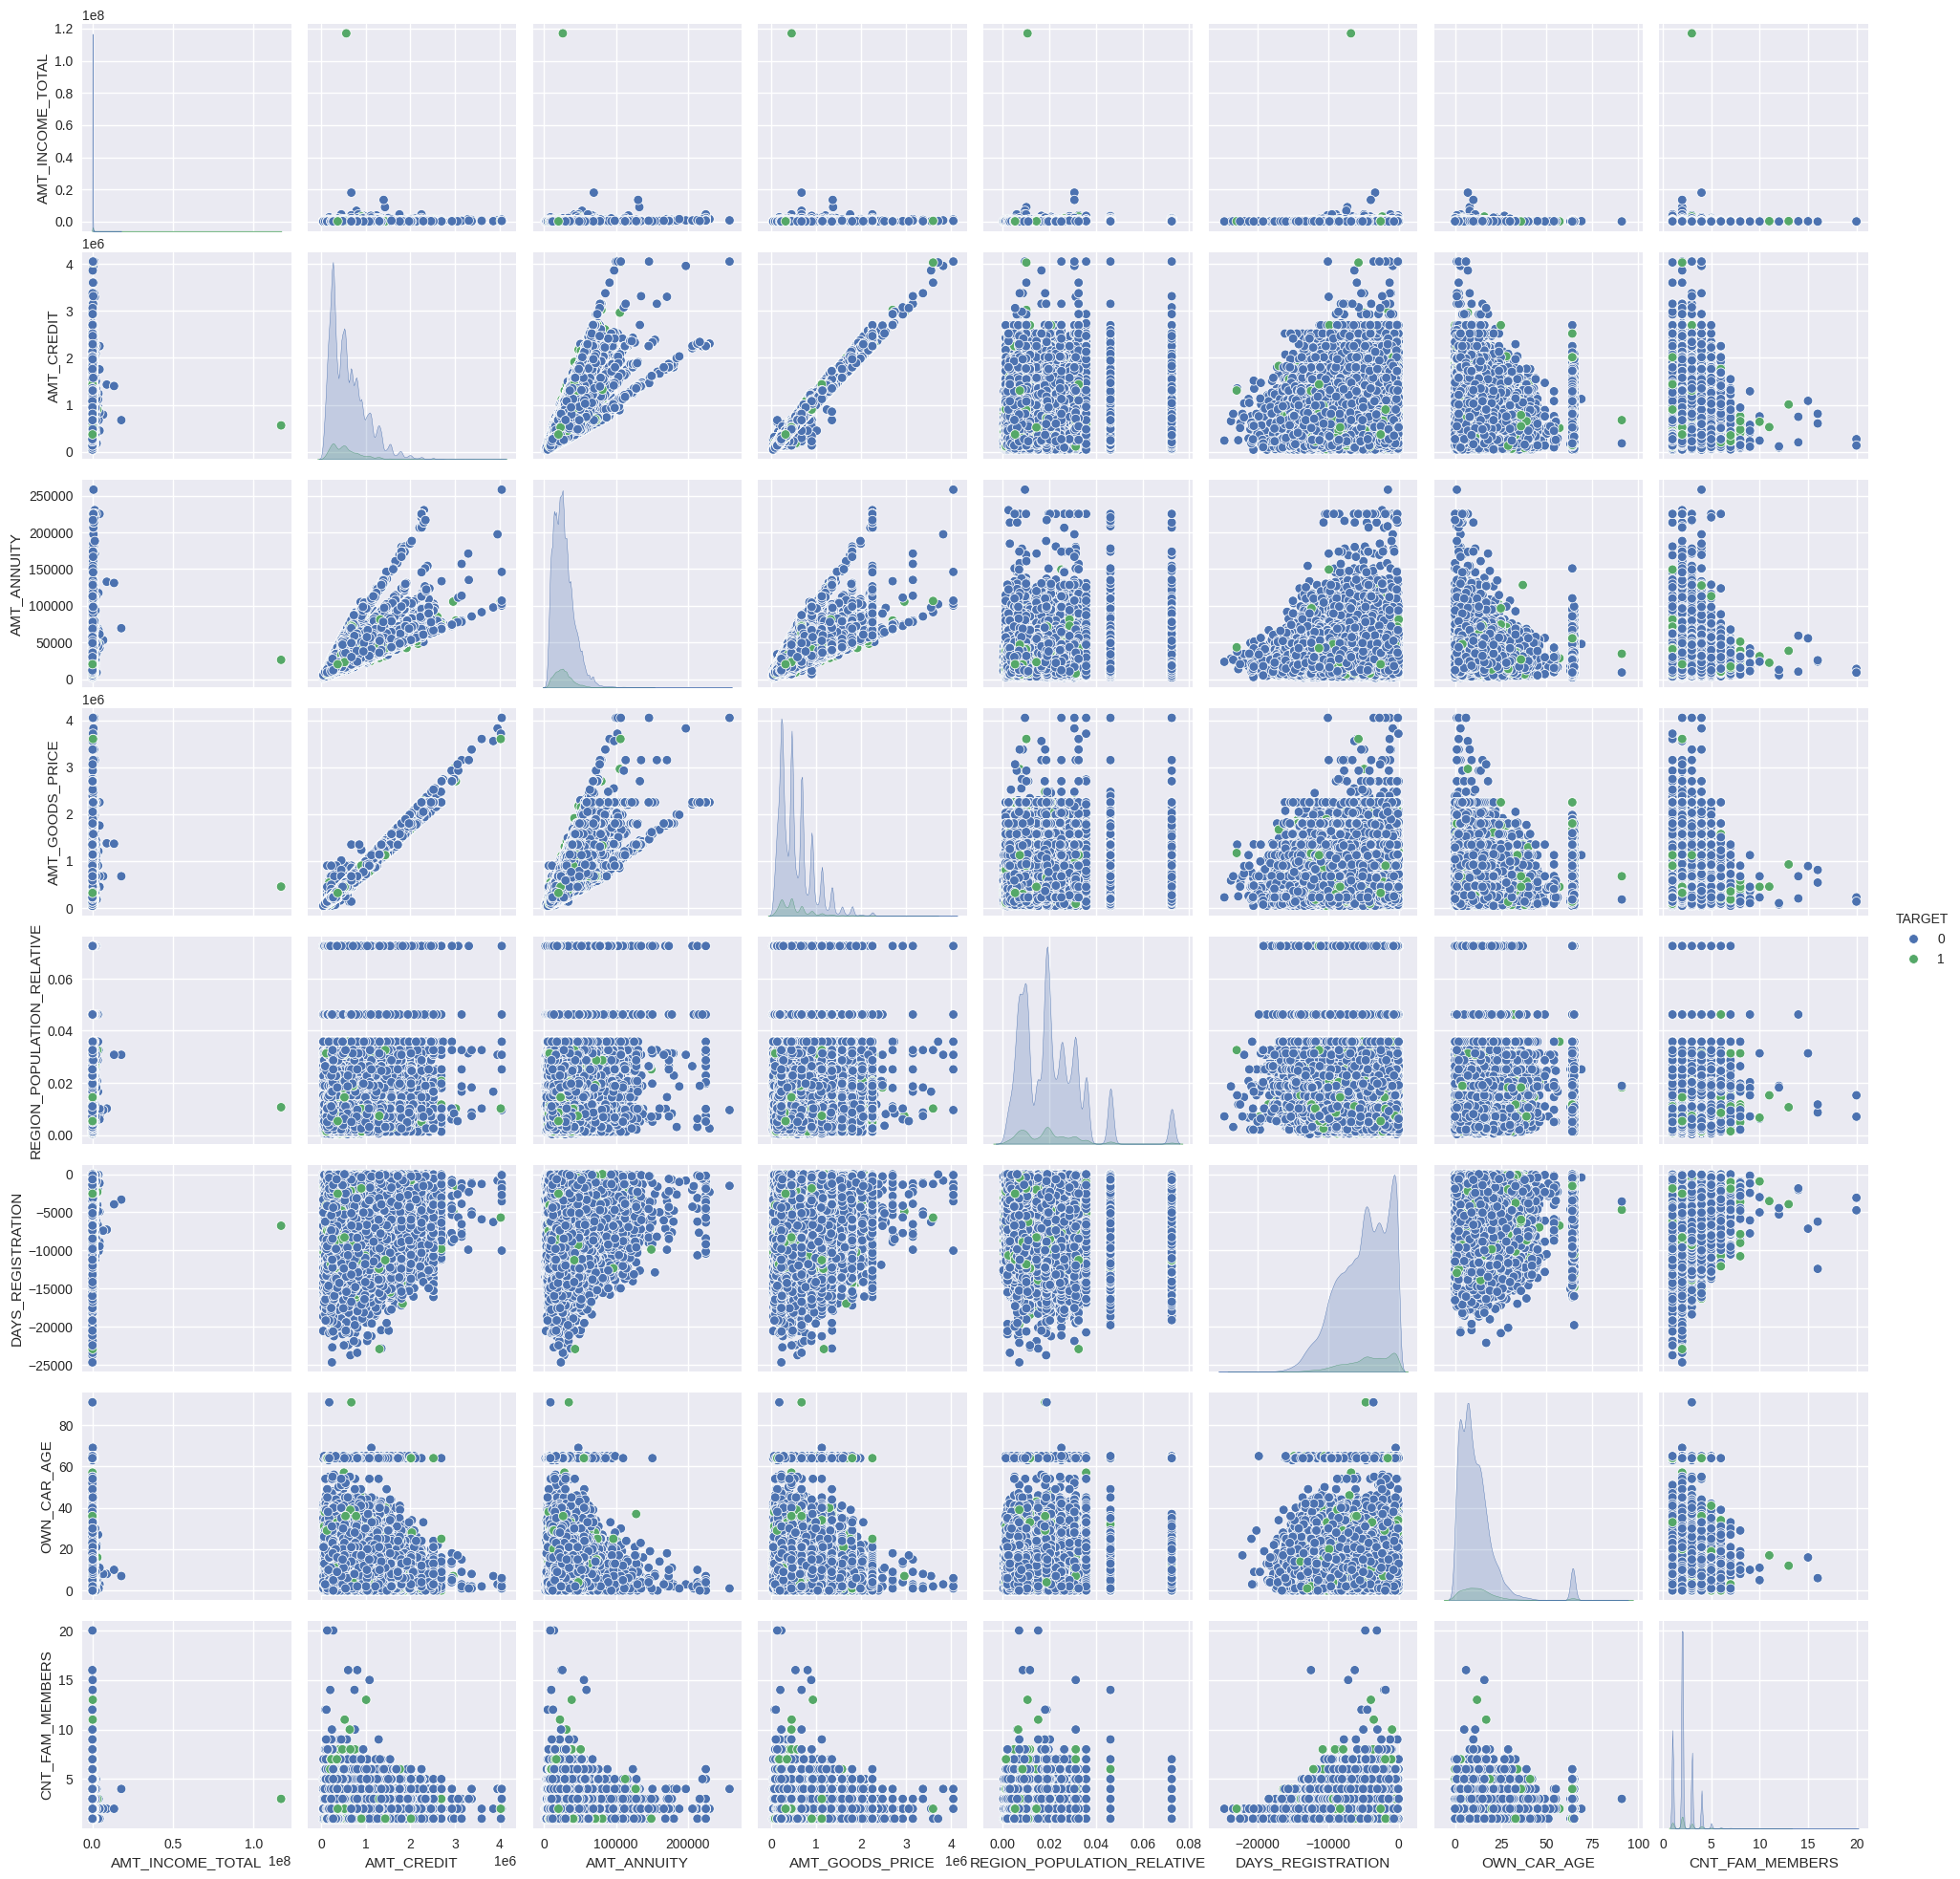

In [30]:
plt.show()

Посмотрим соотношения классов целевой переменной.

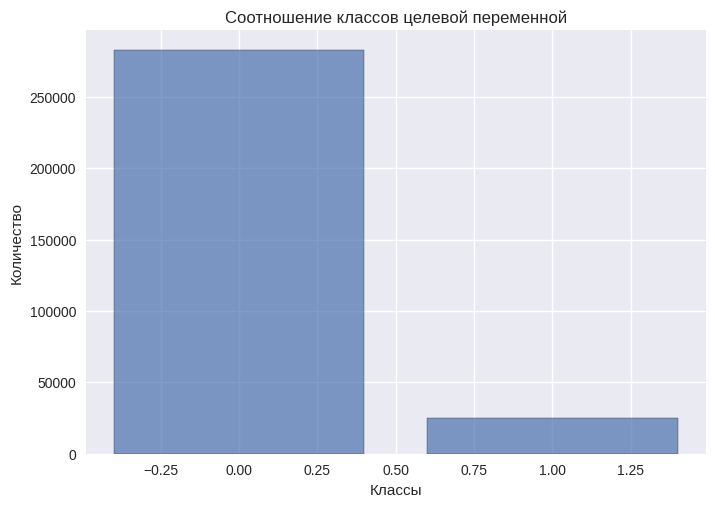

In [63]:
from collections import Counter

classes = Counter(credit_score_df["TARGET"])

plt.bar(classes.keys(),classes.values(), edgecolor='black', alpha=0.7)

plt.title("Соотношение классов целевой переменной")

plt.xlabel("Классы")
plt.ylabel("Количество")

plt.show()

На графике виден явный дисбаланс классов. Поэтому при решении задачи нет смысла использовать метрику `accuracy`, значит нужно пытаться смотреть на разделение классов, будем максимизировать метрику `AUC ROC`. 

Попробуем найти закономерности в категориальных данных, которые качественно отражаются на значении целевой переменной.

In [69]:
pd.crosstab(credit_score_df["CODE_GENDER"], credit_score_df["TARGET"], margins=True).style.background_gradient(cmap='winter')

TARGET,0,1,All
CODE_GENDER,,,
F,188278,14170,202448
M,94404,10655,105059
XNA,4,0,4
All,282686,24825,307511


Оценим значимость пола на целевую переменную. В кросс таблице видно, что женщин-кредиторов в 2 раза больше, чем мужчин, при этом соотношение людей которые не выплатили кредит сохраняется.

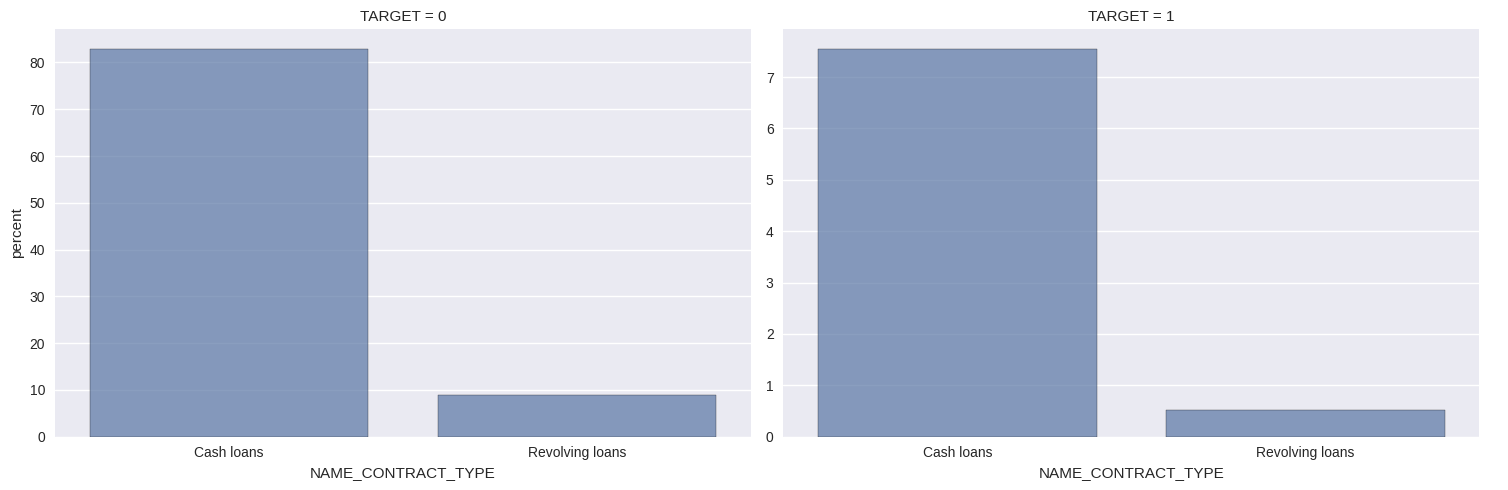

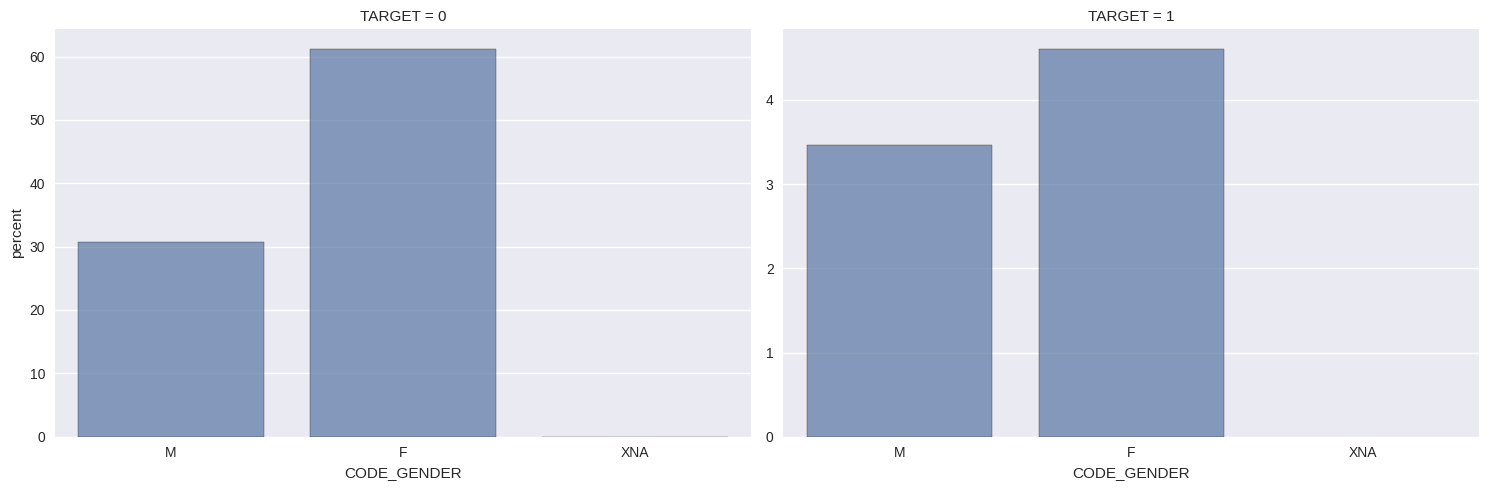

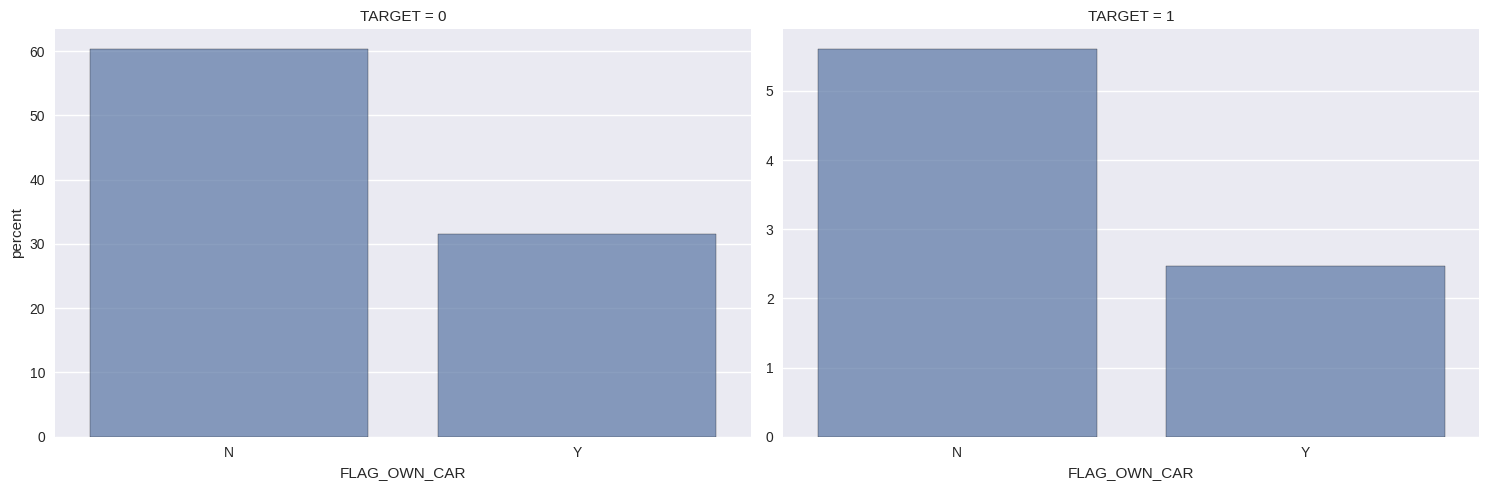

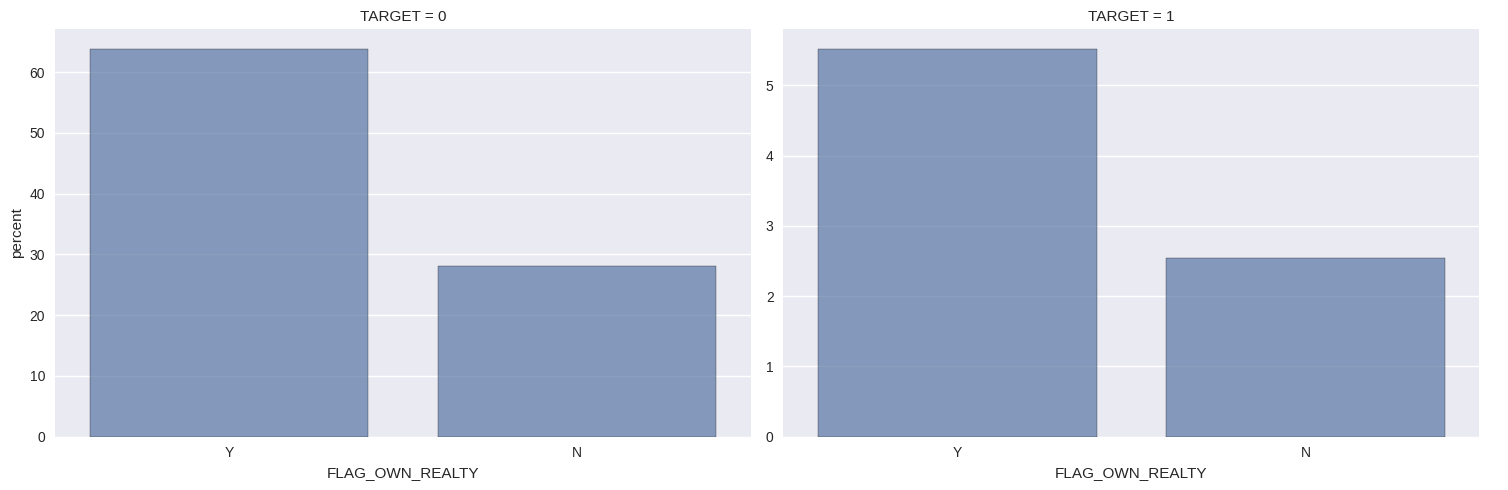

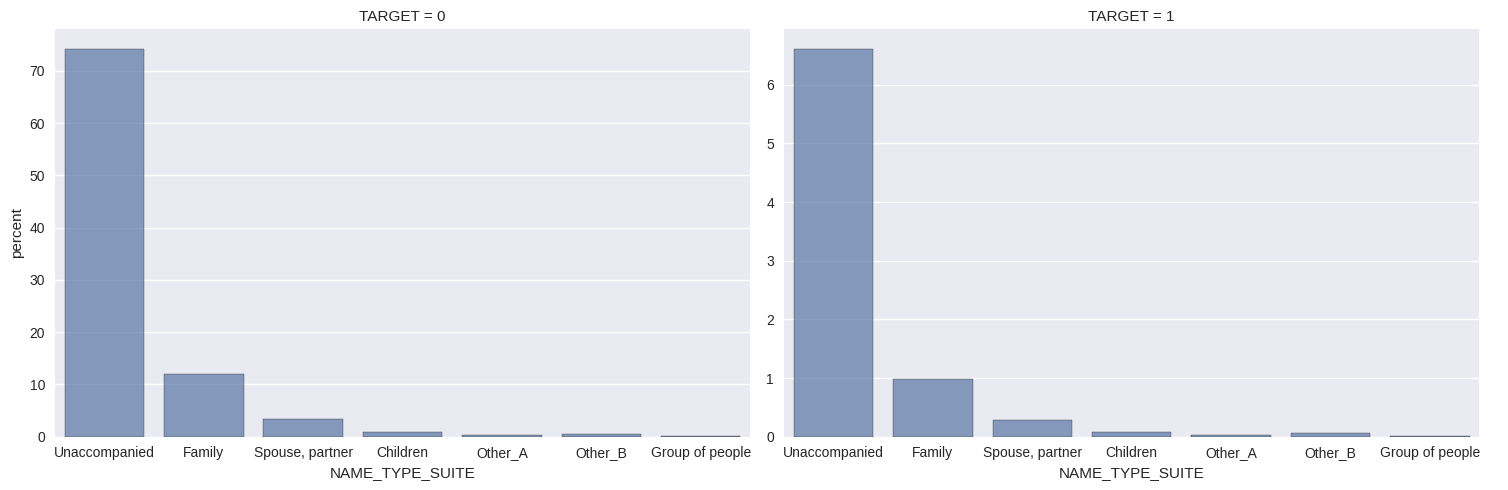

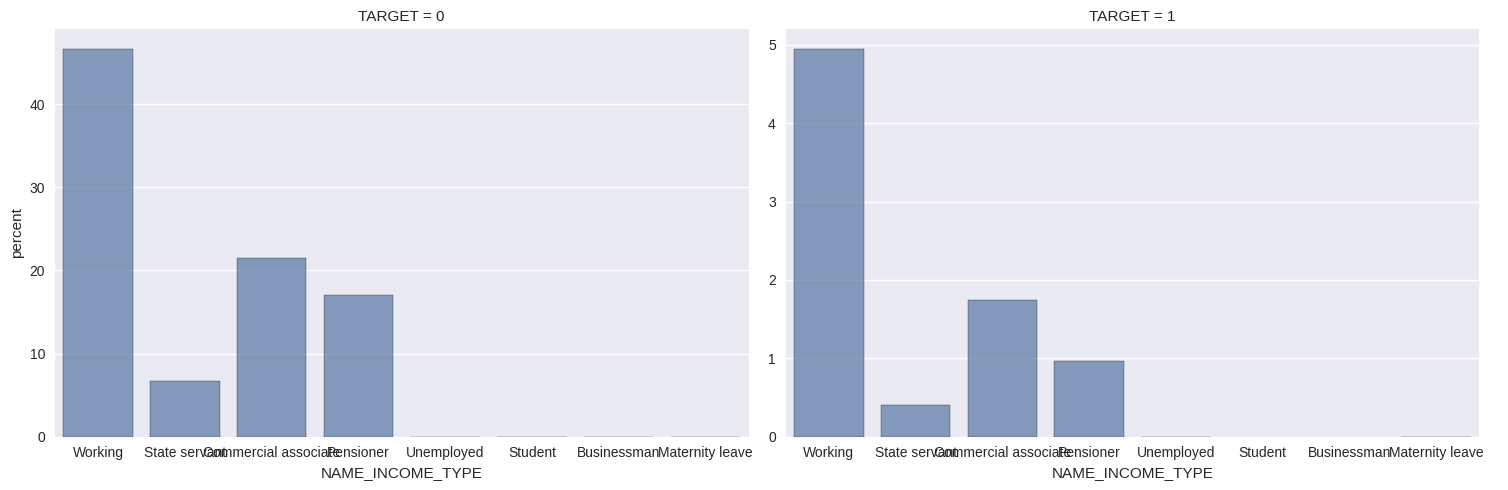

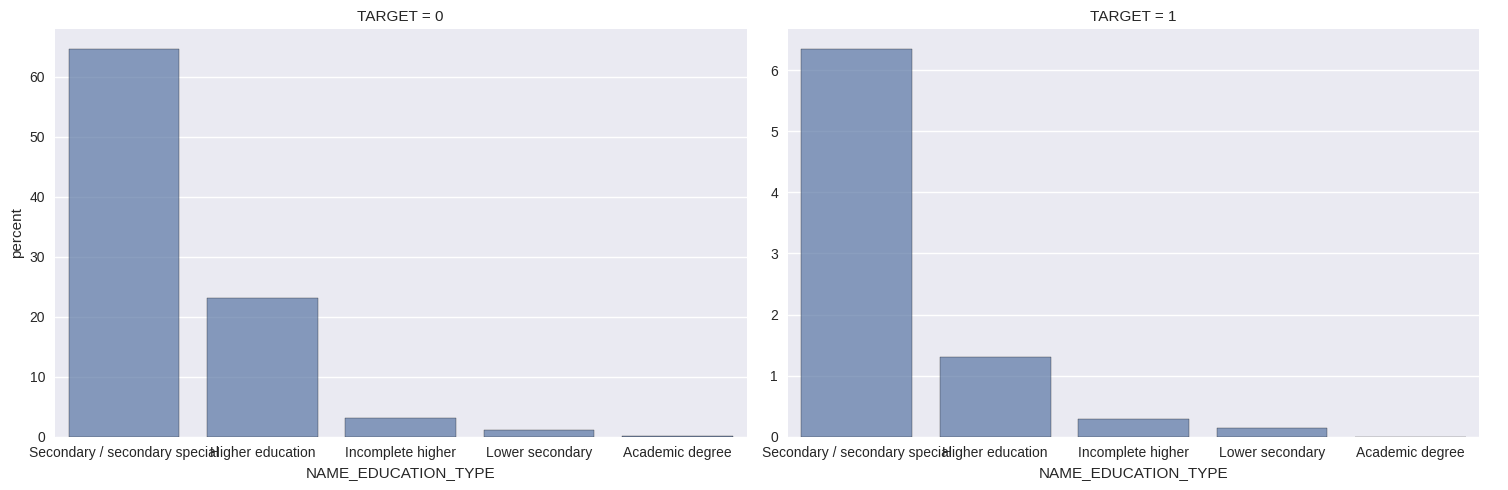

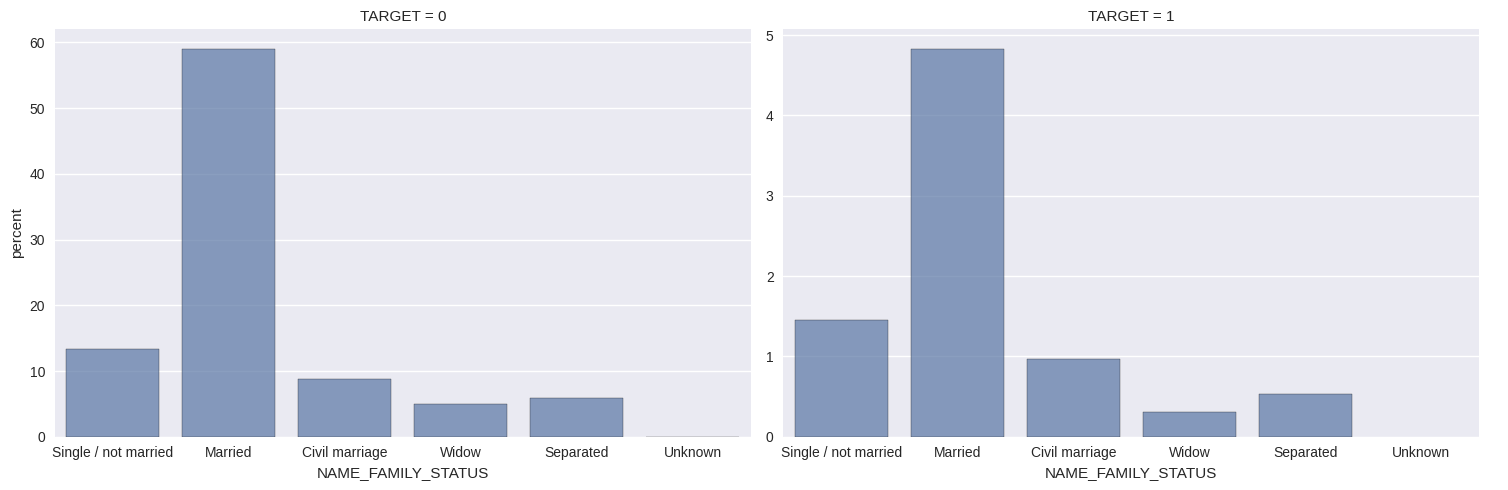

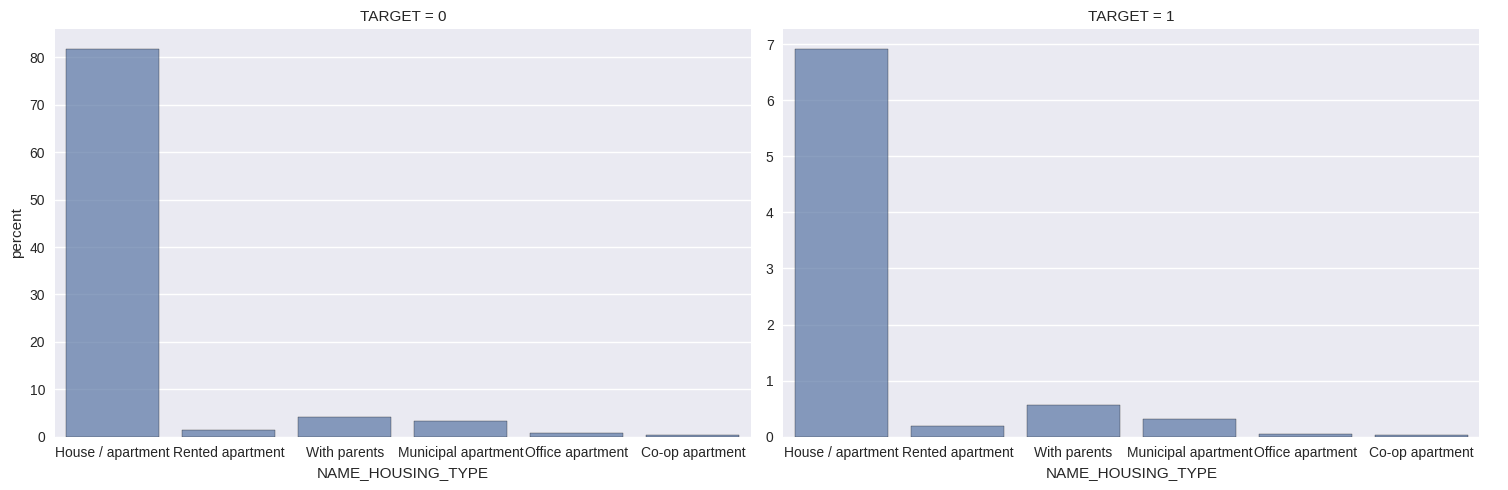

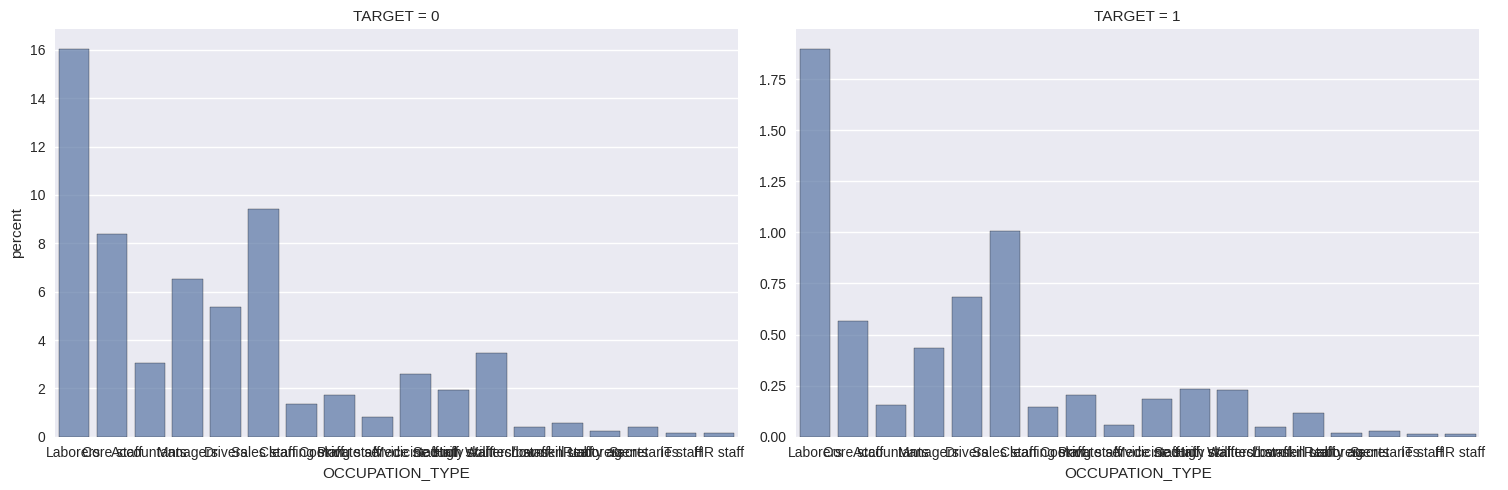

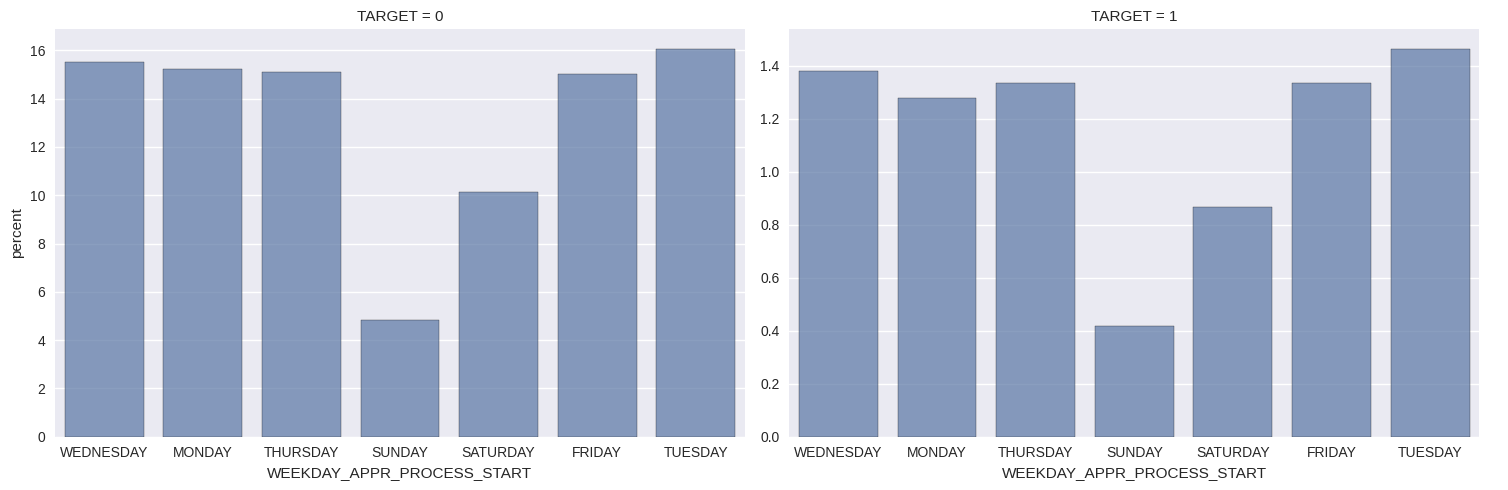

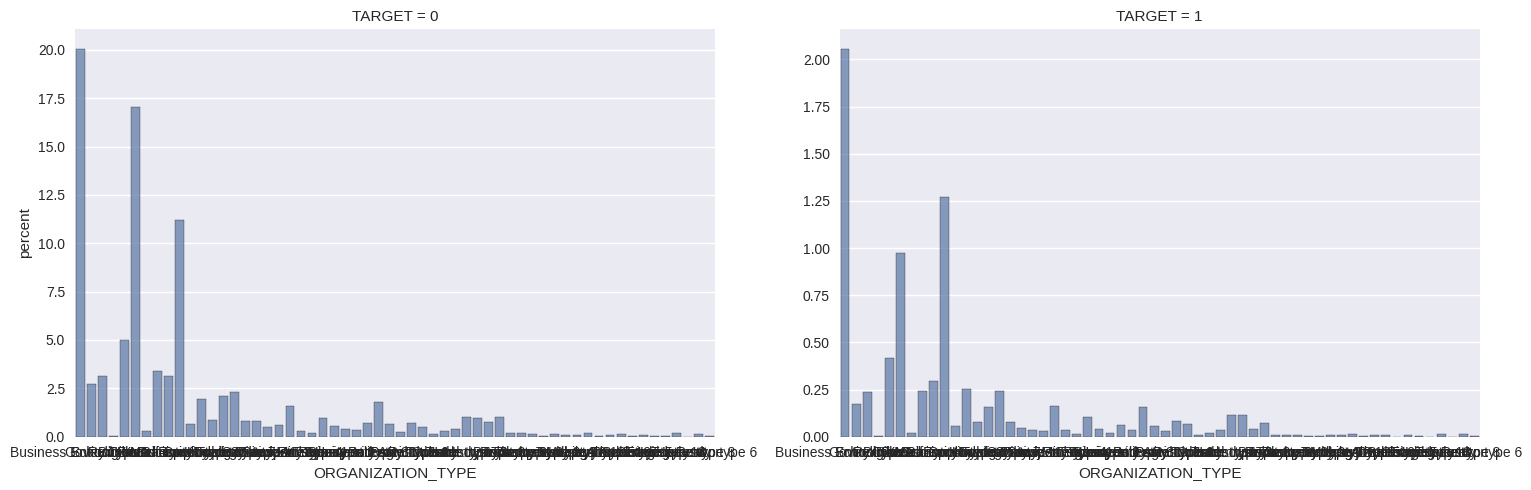

In [91]:
for column in credit_score_df.columns[credit_score_df.dtypes == "object"]:
    sns.catplot(x = column, col = 'TARGET', kind = 'count', data = credit_score_df, stat='percent', aspect=1.5, sharey=False, edgecolor='black', alpha=0.7)
    plt.show()

Нет больших различий в графиках для разных классов целевой переменной.

Посмотрим на статистику признаков в датасете.

In [93]:
credit_score_df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,20.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Построим таблицу парных корелляций для всех признаков.

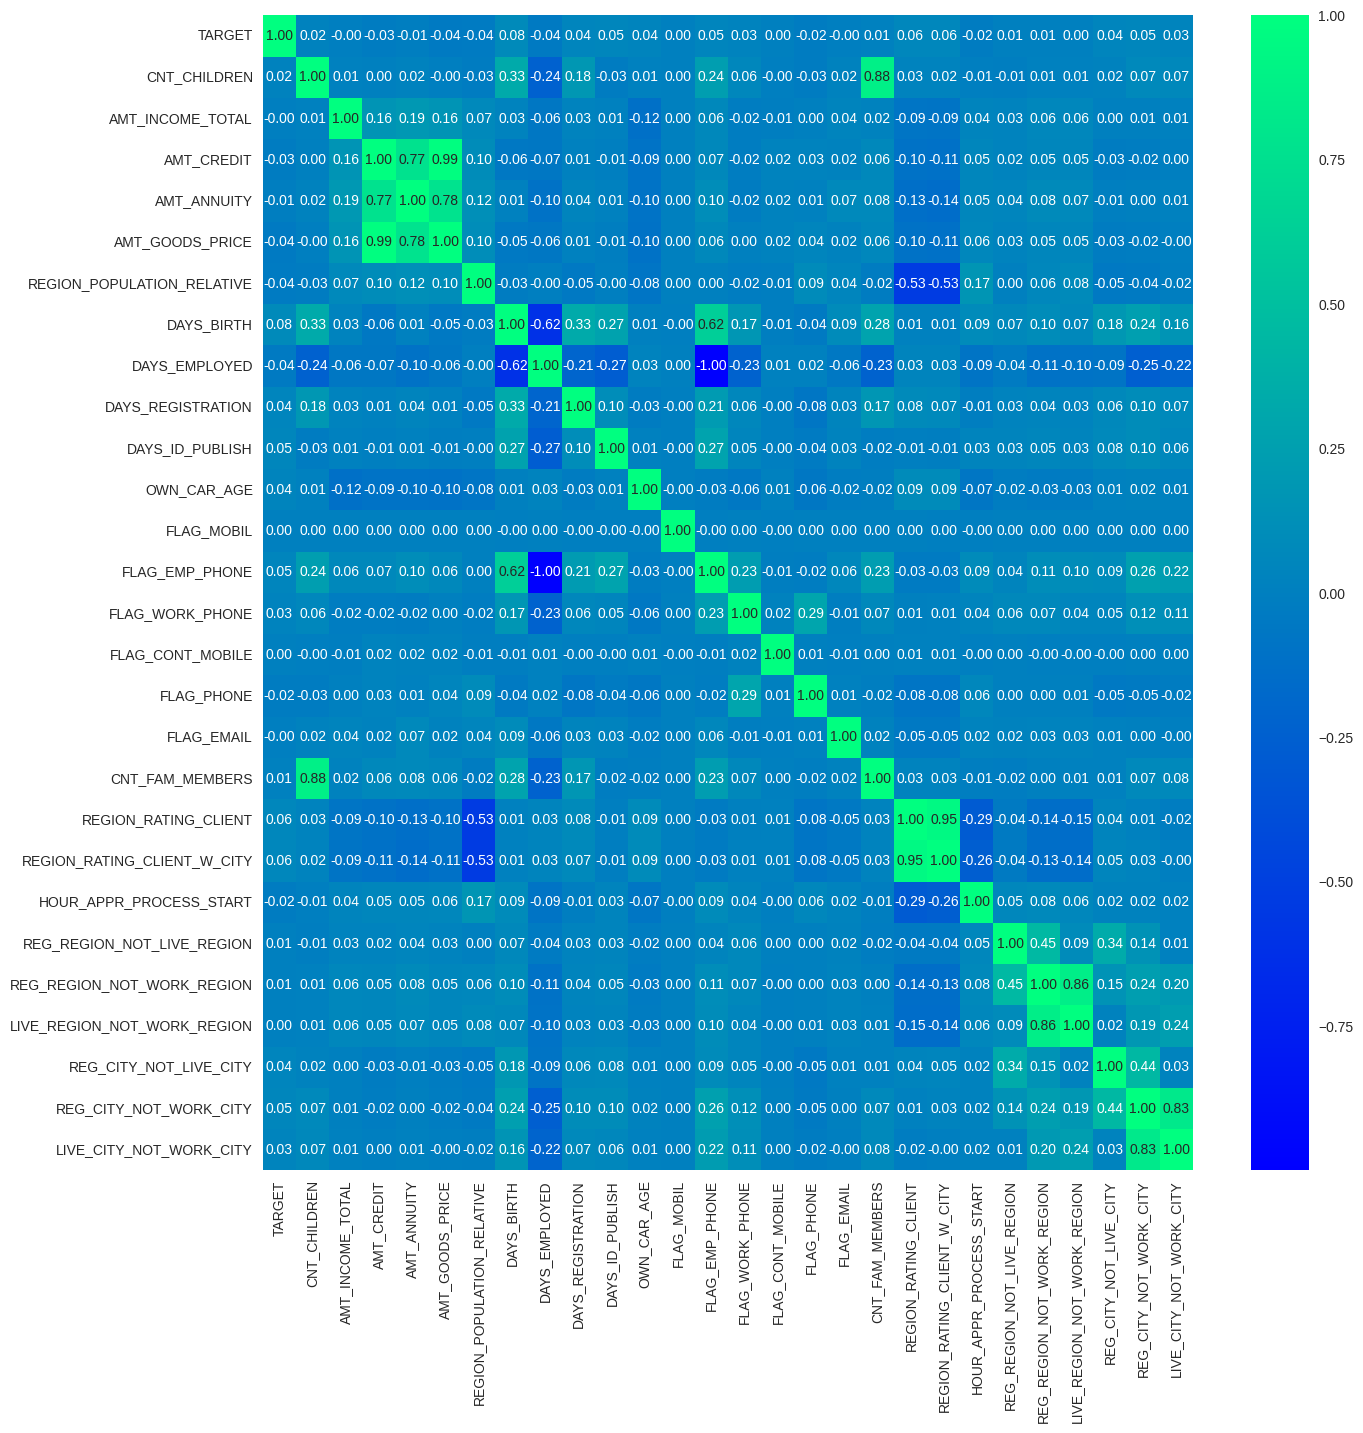

In [98]:
plt.figure(figsize = (15, 15))

sns.heatmap(credit_score_df.select_dtypes(include=['float64', 'int64']).corr(), cmap="winter", annot=True, fmt="0.2f")

plt.show()

Стоит избавиться от признаков имеющих слишком большую корреляцию с другими например `FLAG_EMP_PHONE`.

Исследуем датасет с помощью `ProfileReport` из библиотеки `pandas_profiling`.